# Prática 3 - Processamento de imagens coloridas

## Diógenes Wallis de França Silva

##### Os arquivos com a segmentação no vídeo de treino são "rgb_segmentation.avi", "hsv_segmentatiton.avi" e "yuv_segmentation.avi".

##### Os arquivos com a segmentação no vídeo de teste são "rgb_segmentation_test.avi", "hsv_segmentatiton_test.avi" e "yuv_segmentation_test.avi".

##### O vídeo com a contagem do placar, no espaço HSV, referente ao vídeo de treino é o "train_final_marker.avi" e ao de teste "test_final_marker.avi". Para o espaço RGB: "rgb_train_final_marker.avi" e "rgb_test_final_marker.avi". Para o espaço YUV: "yuv_train_final_marker.avi" e "yuv_test_final_marker.avi".



### Importando as bibliotecas

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,12

%matplotlib inline

# Etapa 1

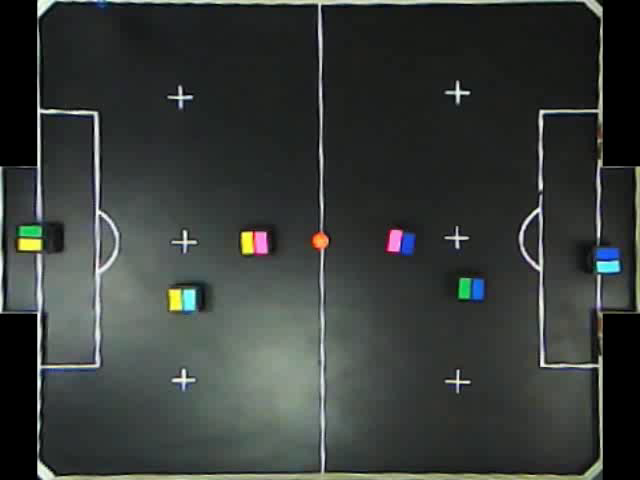

True

In [24]:
#capturando o primeiro frame do vídeo de treino para usar como referência nos ajustes da segmentação
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train00.mp4")

ret, frame = cap.read()

cv2_imshow(frame)

cv2.imwrite("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg",frame)

### Segmentação de cor (RGB)

##### Para realizar a segmentação em RGB, recortou-se a imagem da bola no primeiro frame do vídeo de treinamento e nesta imagem foi calculado o valor médio das intensidades em cada canal.

In [25]:
orange_ball = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/orange_ball.jpg")[:,:,::-1]

red = []
green = []
blue = []

for i in range(orange_ball.shape[0]):
  for j in range(orange_ball.shape[1]):
    if orange_ball[i][j][1] < 220:
      red.append(orange_ball[i][j][0])
      green.append(orange_ball[i][j][1])
      blue.append(orange_ball[i][j][2])

average_color = np.array([np.mean(red),np.mean(green),np.mean(blue)])

average_color

array([234.44755245, 147.01398601,  86.6013986 ])

##### O range para cada canal vai da intensidade média - 2 vezes o desvio padrão até a intensidade média + 2 vezes o desvio padrão.

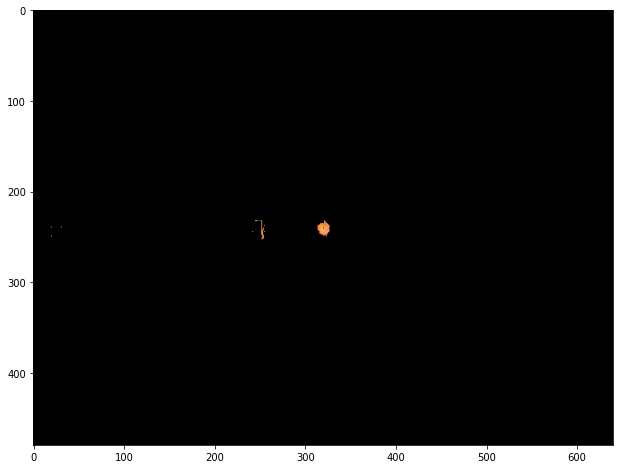

In [26]:
#box

rgb = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")[:,:,::-1]
std = 2
# Define lower and uppper limits of what we call "orange"
orange_lo=np.array([np.mean(red)-std*np.std(red),np.mean(green)-std*np.std(green),np.mean(blue)-std*np.std(blue)])
orange_hi=np.array([np.mean(red)+std*np.std(red),np.mean(green)+std*np.std(green),np.mean(blue)+std*np.std(blue)])

# Mask image to only select oranges
mask=cv2.inRange(rgb,orange_lo,orange_hi)
output = cv2.bitwise_and(rgb,rgb, mask= mask)

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

##### Foi utilizado um filtro de mediana para remover ruídos.

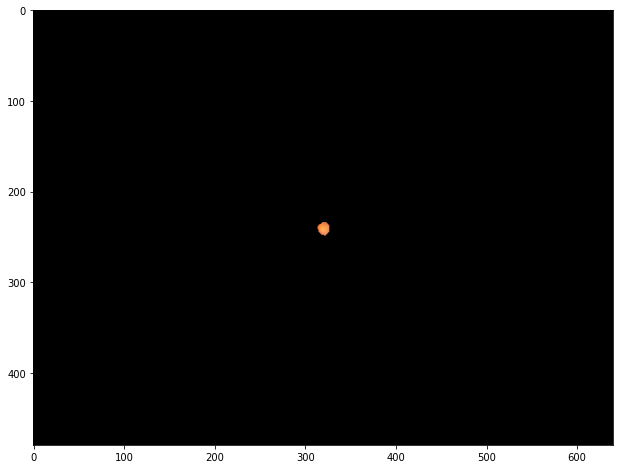

In [27]:
output = cv2.medianBlur(output, 5)
plt.imshow(output)

##### Agora é gerada a segmentação no vídeo de treino

In [28]:
def rgb_orange_detector(red,green,blue,frame):

  std = 2
  # Define lower and uppper limits of what we call "orange"
  orange_lo=np.array([np.mean(red)-std*np.std(red),np.mean(green)-std*np.std(green),np.mean(blue)-std*np.std(blue)])
  orange_hi=np.array([np.mean(red)+std*np.std(red),np.mean(green)+std*np.std(green),np.mean(blue)+std*np.std(blue)])

  # Mask image to only select oranges
  mask=cv2.inRange(frame,orange_lo,orange_hi)
  output = cv2.bitwise_and(frame,frame, mask= mask)

  output = cv2.medianBlur(output, 5)

  return output

In [29]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/rgb_segmentation.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0

while(True):

  ret, frame = cap.read()


  if ret == True:

    frame = frame[:,:,::-1]
    
    output = rgb_orange_detector(red,green,blue,frame)

    out.write(output[:,:,::-1])
    #cnt+=1
    #print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

### Segmentação de cor (HSV)

##### Para realizar a segmentação, fez-se uma análise nas cores correspondentes aos diferentes intervalos de H e escolheu-se o range apropriado para a cor laranja.

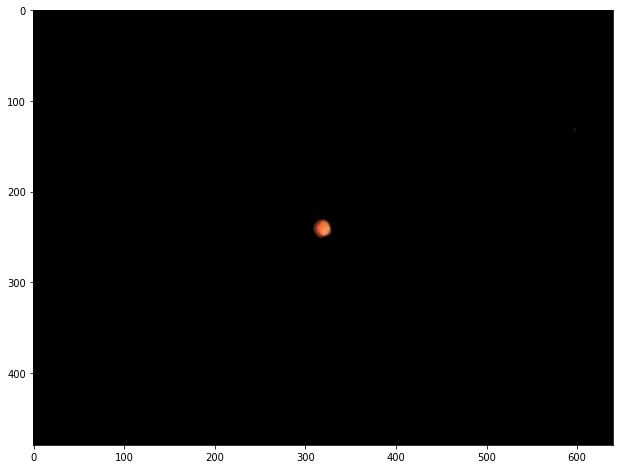

In [30]:
#box

def hsv_orange_detector(img_bgr):

  hsv=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)

  # Define lower and uppper limits of what we call "orange"
  orange_lo=np.array([1,100,20])
  orange_hi=np.array([15,255,255])

  # Mask image to only select oranges
  mask=cv2.inRange(hsv,orange_lo,orange_hi)
  output = cv2.bitwise_and(hsv,hsv, mask= mask)

  output = cv2.cvtColor(output,cv2.COLOR_HSV2RGB)

  return cv2.medianBlur(output, 7)

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")

output = hsv_orange_detector(bgr)

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

##### Agora é gerada a segmentação no vídeo de treino

In [31]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/hsv_segmentation.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0

while(True):

  ret, frame = cap.read()


  if ret == True:

    output = hsv_orange_detector(frame)    

    out.write(output[:,:,::-1])
    cnt+=1
    #print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

### Segmentação de cor (YUV)

##### Semelhante ao caso anterior, fez-se a análise referente aos valores de YUV que representassem a cor laranja e assim o range foi definido.

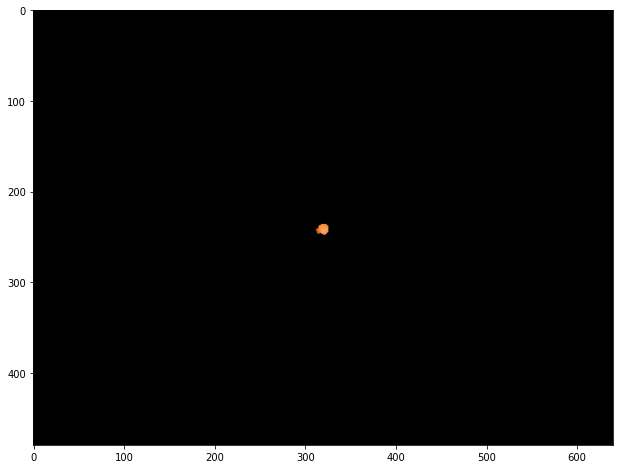

In [32]:
#box

def yuv_orange_detector(img_bgr):

  yuv=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2YUV)

  # Define lower and uppper limits of what we call "orange"
  orange_lo=np.array([0,60,180])
  orange_hi=np.array([200,100,220])

  # Mask image to only select oranges
  mask=cv2.inRange(yuv,orange_lo,orange_hi)
  output = cv2.bitwise_and(yuv,yuv, mask = mask)

  output = cv2.cvtColor(output,cv2.COLOR_YUV2RGB)
  output = cv2.medianBlur(output, 5)

  rcParams['figure.figsize'] = 15,8

  output[output[:, :, 1]==125]=(0,0,0)

  return output

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")

output = yuv_orange_detector(bgr)

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

##### Agora é gerada a segmentação no vídeo de treino

In [33]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/yuv_segmentation.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0

while(True):

  ret, frame = cap.read()


  if ret == True:

    output = yuv_orange_detector(frame)    

    out.write(output[:,:,::-1])
    cnt+=1
    #print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

# Etapa 2

##### Foram utilizados três espaços de cores: RGB, HSV e YUV.
##### Em RGB: o canal R contém a intensidade da cor vermelha (O R porque vermelho em inglês é red), o canal G contém o nível de verde e B o de azul. A combinação dessas três cores, em diversos níveis, gera as demais cores da imagem. Para as imagens em questão, cada canal continha 8 bits, variando então de 0 a 255 níveis de intensidade. 

##### Em HSV: O H (hue) é a porção de cor do modelo, variando de 0 a 360, ficando cada cor em um intervalo dentro dessa variação. S (saturation) é a saturação e descreve a intensidade da cor, variando de 0 a 100, em que 0 é cinza e 100 é a cor mais "intensa" pode-se dizer. V (value) é o brilho, variando de 0 a 100, em que 0 é preto e 100 é o máximo de brilho.

##### Já o YUV: Y é referente ao brilho, U e V providenciam informação da cor, também chamados de canais de crominância.

# Etapa 3

##### Gerando vídeo de teste para o RGB

In [34]:
def rgb_orange_detector(red,green,blue,frame):

  std = 2
  # Define lower and uppper limits of what we call "orange"
  orange_lo=np.array([np.mean(red)-std*np.std(red),np.mean(green)-std*np.std(green),np.mean(blue)-std*np.std(blue)])
  orange_hi=np.array([np.mean(red)+std*np.std(red),np.mean(green)+std*np.std(green),np.mean(blue)+std*np.std(blue)])

  # Mask image to only select oranges
  mask=cv2.inRange(frame,orange_lo,orange_hi)
  output = cv2.bitwise_and(frame,frame, mask= mask)

  output = cv2.medianBlur(output, 5)

  return output

In [35]:
#rgb

cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/eval00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/rgb_segmentation_test.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0

while(True):

  ret, frame = cap.read()


  if ret == True:

    frame = frame[:,:,::-1]
    
    output = rgb_orange_detector(red,green,blue,frame)

    out.write(output[:,:,::-1])
    cnt+=1

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

##### Gerando o vídeo de teste para o HSV

In [36]:
#hsv

cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/eval00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/hsv_segmentation_test.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0

while(True):

  ret, frame = cap.read()


  if ret == True:

    output = hsv_orange_detector(frame)    

    out.write(output[:,:,::-1])
    cnt+=1

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

##### Gerando o vídeo de teste para o YUV

In [37]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/eval00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/yuv_segmentation_test.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0

while(True):

  ret, frame = cap.read()


  if ret == True:

    output = yuv_orange_detector(frame)    

    out.write(output[:,:,::-1])
    cnt+=1

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

#### Foram gerados 3 vídeos de testes para cada espaço de cor. Fazendo uma análise visual, opta-se pelo espaço de cor **HSV**, uma vez que ele foi mais robusto do que os demais.

# Etapa 4

### Verificando a posição das linhas dos gols para train00

37 602


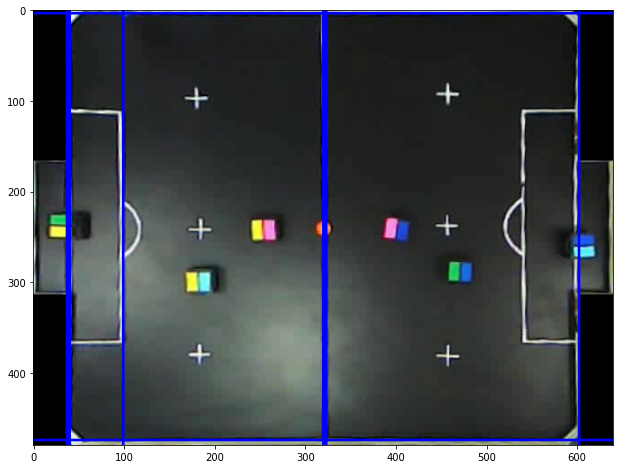

In [38]:
def detect_lines(bgr):

  rgb=cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(bgr,cv2.COLOR_BGR2GRAY)

  line_x = []

  blurredImage = cv2.GaussianBlur(gray, (5, 5), 0)
  edges = cv2.Canny(blurredImage, 50, 120)

  # Detect points that form a line
  dis_reso = 1 # Distance resolution in pixels of the Hough grid
  theta = np.pi /180 # Angular resolution in radians of the Hough grid
  threshold = 170# minimum no of votes

  lines = cv2.HoughLines(edges, dis_reso, theta, threshold)

  # The below for loop runs till r and theta values 
  # are in the range of the 2d array

  for line in lines:
      for r,theta in line:
        
        # Stores the value of cos(theta) in a
        a = np.cos(theta)
      
        # Stores the value of sin(theta) in b
        b = np.sin(theta)
          
        # x0 stores the value rcos(theta)
        x0 = a*r
          
        # y0 stores the value rsin(theta)
        y0 = b*r
          
        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000*(-b))
          
        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000*(a))
      
        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000*(-b))
          
        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000*(a))
        
        if np.abs(y2 - y1) > 50:
          line_x.append(np.min((x1,x2))) 

        rgb = cv2.line(rgb,(x1,y1), (x2,y2), (0,0,255),2)

  rcParams['figure.figsize'] = 15,8

  plt.imshow(rgb)

  print(np.min(line_x),np.max(line_x))

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")

detect_lines(bgr)

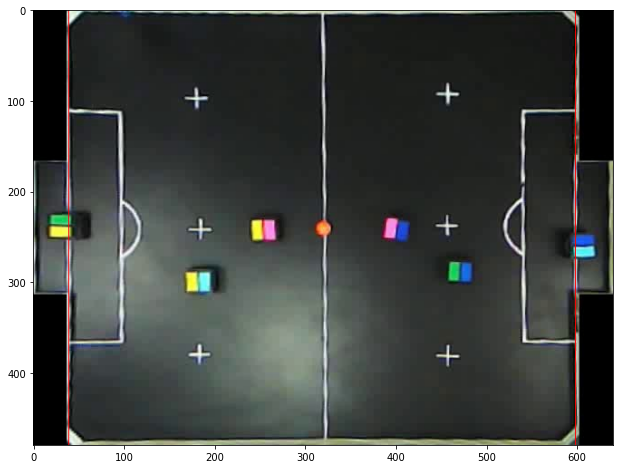

In [39]:
#box

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

output = cv2.line(rgb,(598,0),(598,rgb.shape[1]),(255,0,0),1)  
output = cv2.line(rgb,(39,0),(39,rgb.shape[1]),(255,0,0),1)  

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

### Verificando a posição das linhas dos gols para eval00

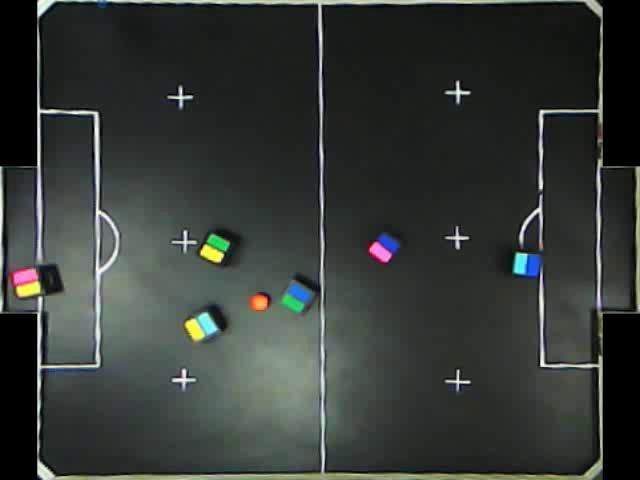

True

In [40]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/eval00.mp4")

ret, frame = cap.read()

cv2_imshow(frame)

cv2.imwrite("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame_eval.jpg",frame)

37 602


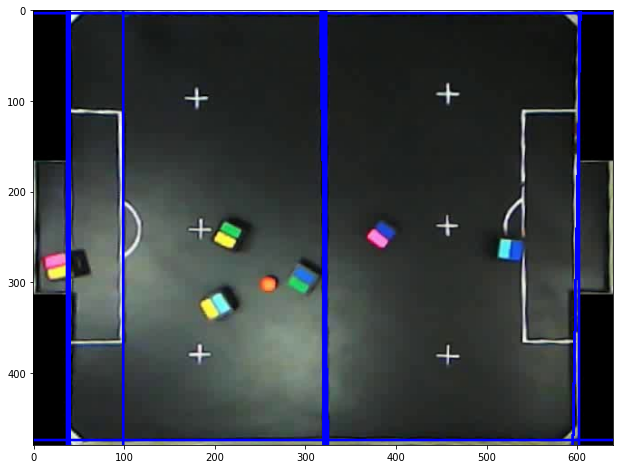

In [41]:
bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame_eval.jpg")

detect_lines(bgr)

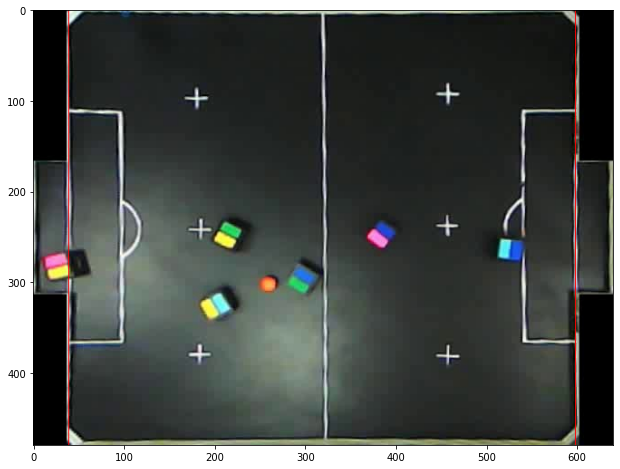

In [42]:
#box

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame_eval.jpg")
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

output = cv2.line(rgb,(598,0),(598,rgb.shape[1]),(255,0,0),1)  
output = cv2.line(rgb,(39,0),(39,rgb.shape[1]),(255,0,0),1)  

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

### Preparando para contagem de gols (HSV)

##### Note que são desenhadas duas linhas verticais que servem como referência para saber a posição da bola. Para esta etapa foi utilizado o processo de opening após a aplicação do filtro de mediana, para fins de remover alguns ruídos remanescentes.

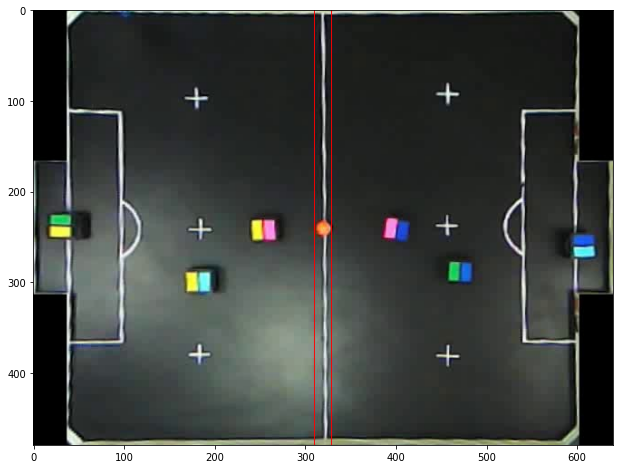

In [43]:
#box

def hsv_orange_line_marker(img_bgr):

  hsv=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)

  # Define lower and uppper limits of what we call "orange"
  orange_lo=np.array([1,100,20])
  orange_hi=np.array([15,255,255])

  # Mask image to only select oranges
  mask=cv2.inRange(hsv,orange_lo,orange_hi)
  output = cv2.bitwise_and(hsv,hsv, mask= mask)

  output = cv2.cvtColor(output,cv2.COLOR_HSV2RGB)

  output = cv2.medianBlur(output, 7)

  kernel = np.ones((5,5),np.uint8)

  output = cv2.morphologyEx(output, cv2.MORPH_OPEN, kernel)

  yx_coords = np.column_stack(np.where(output > 25))

  output = cv2.line(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB),(np.min(yx_coords,axis=0)[1],0),(np.min(yx_coords,axis=0)[1],rgb.shape[1]),(255,0,0),1)

  output = cv2.line(output,(np.max(yx_coords,axis=0)[1],0),(np.max(yx_coords,axis=0)[1],rgb.shape[1]),(255,0,0),1)

  return (output,np.min(yx_coords,axis=0)[1],np.max(yx_coords,axis=0)[1])

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")

output,left_ball,right_ball = hsv_orange_line_marker(bgr)

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

##### Gerando vídeo com o placar para **train00**. O resultado pode ser obtido no próprio vídeo ou verificando os valores das variáveis blue_team e yellow_team.

In [45]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train_final_marker.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0
goal_check = False
blue_team = 0
yellow_team = 0

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while(True):

  ret, frame = cap.read()


  if ret == True:

    try:

      output,left_ball,right_ball = hsv_orange_line_marker(frame)

      if goal_check == True and left_ball > 39 and right_ball < 598:
        goal_check = False

      if right_ball < 39 and goal_check == False:
        blue_team +=1
        goal_check = True

      if left_ball > 598 and goal_check == False:
        yellow_team +=1
        goal_check = True

      output = cv2.putText(output,str(yellow_team), 
      (0,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

      output = cv2.putText(output,str(blue_team), 
      (603,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

    except:
      #print("Bola não detectada")
      output = frame 

    out.write(output[:,:,::-1])
#    cnt+=1
#    print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

print("Placar do time amarelo: ",yellow_team)
print("Placar do time azul: ",blue_team)

Placar do time amarelo:  1
Placar do time azul:  0


##### Gerando vídeo com o placar para **eval00**. O resultado pode ser obtido no próprio vídeo ou verificando os valores das variáveis blue_team e yellow_team.

In [44]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/eval00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/test_final_marker.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0
goal_check = False
blue_team = 0
yellow_team = 0

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while(True):

  ret, frame = cap.read()


  if ret == True:

    try:

      output,left_ball,right_ball = hsv_orange_line_marker(frame)

      if goal_check == True and left_ball > 39 and right_ball < 598:
        goal_check = False

      if right_ball < 39 and goal_check == False:
        blue_team +=1
        goal_check = True

      if left_ball > 598 and goal_check == False:
        yellow_team +=1
        goal_check = True

      output = cv2.putText(output,str(yellow_team), 
      (0,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

      output = cv2.putText(output,str(blue_team), 
      (603,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

    except:
      #print("Bola não detectada")
      output = frame 

    out.write(output[:,:,::-1])
#    cnt+=1
#    print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

print("Placar do time amarelo: ",yellow_team)
print("Placar do time azul: ",blue_team)

Placar do time amarelo:  9
Placar do time azul:  1


### Preparando para contagem de gols (RGB)

##### Note que são desenhadas duas linhas verticais que servem como referência para saber a posição da bola. Para esta etapa foi utilizado o processo de opening após a aplicação do filtro de mediana, para fins de remover alguns ruídos remanescentes.

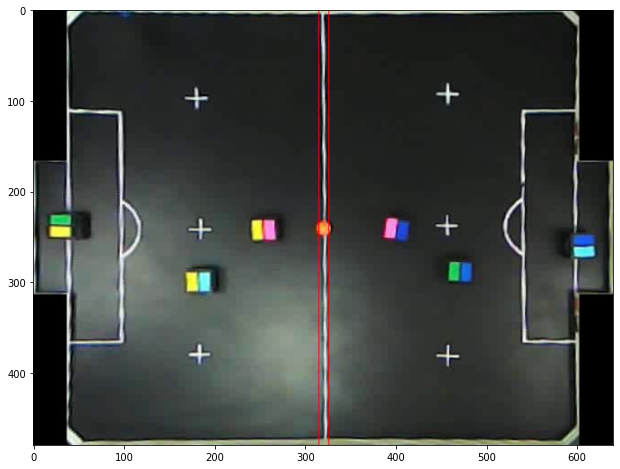

In [51]:
#box

def rgb_orange_line_marker(red,green,blue,img_bgr):

  frame = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

  std = 2
  # Define lower and uppper limits of what we call "orange"
  orange_lo=np.array([np.mean(red)-std*np.std(red),np.mean(green)-std*np.std(green),np.mean(blue)-std*np.std(blue)])
  orange_hi=np.array([np.mean(red)+std*np.std(red),np.mean(green)+std*np.std(green),np.mean(blue)+std*np.std(blue)])

  # Mask image to only select oranges
  mask=cv2.inRange(frame,orange_lo,orange_hi)
  output = cv2.bitwise_and(frame,frame, mask= mask)

  output = cv2.medianBlur(output, 5)

  kernel = np.ones((5,5),np.uint8)

  output = cv2.morphologyEx(output, cv2.MORPH_OPEN, kernel)

  yx_coords = np.column_stack(np.where(output > 25))

  output = cv2.line(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB),(np.min(yx_coords,axis=0)[1],0),(np.min(yx_coords,axis=0)[1],rgb.shape[1]),(255,0,0),1)

  output = cv2.line(output,(np.max(yx_coords,axis=0)[1],0),(np.max(yx_coords,axis=0)[1],rgb.shape[1]),(255,0,0),1)

  return (output,np.min(yx_coords,axis=0)[1],np.max(yx_coords,axis=0)[1])

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")

output,left_ball,right_ball = rgb_orange_line_marker(red,green,blue,bgr)

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

##### Vídeo de treino

In [61]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/rgb_train_final_marker.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0
goal_check = False
blue_team = 0
yellow_team = 0

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while(True):

  ret, frame = cap.read()


  if ret == True:

    try:

      output,left_ball,right_ball = rgb_orange_line_marker(red,green,blue,frame)

      if goal_check == True and left_ball > 39 and right_ball < 598:
        goal_check = False

      if right_ball < 39 and goal_check == False:
        blue_team +=1
        goal_check = True

      if left_ball > 598 and goal_check == False:
        yellow_team +=1
        goal_check = True

      output = cv2.putText(output,str(yellow_team), 
      (0,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

      output = cv2.putText(output,str(blue_team), 
      (603,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

    except:
      #print("Bola não detectada")
      output = frame 

    out.write(output[:,:,::-1])
#    cnt+=1
#    print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

print("Placar do time amarelo: ",yellow_team)
print("Placar do time azul: ",blue_team)

Placar do time amarelo:  1
Placar do time azul:  0


##### Vídeo de teste

In [55]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/eval00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/rgb_test_final_marker.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0
goal_check = False
blue_team = 0
yellow_team = 0

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while(True):

  ret, frame = cap.read()


  if ret == True:

    try:

      output,left_ball,right_ball = rgb_orange_line_marker(red,green,blue,frame)

      if goal_check == True and left_ball > 39 and right_ball < 598:
        goal_check = False

      if right_ball < 39 and goal_check == False:
        blue_team +=1
        goal_check = True

      if left_ball > 598 and goal_check == False:
        yellow_team +=1
        goal_check = True

      output = cv2.putText(output,str(yellow_team), 
      (0,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

      output = cv2.putText(output,str(blue_team), 
      (603,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

    except:
      #print("Bola não detectada")
      output = frame 

    out.write(output[:,:,::-1])
#    cnt+=1
#    print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

print("Placar do time amarelo: ",yellow_team)
print("Placar do time azul: ",blue_team)

Placar do time amarelo:  9
Placar do time azul:  1


### Preparando para contagem de gols (YUV)

##### Note que são desenhadas duas linhas verticais que servem como referência para saber a posição da bola.

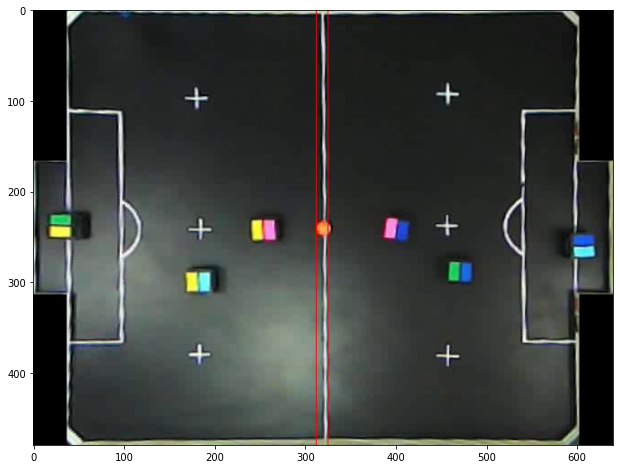

In [58]:
#box

def yuv_orange_line_marker(img_bgr):

  yuv=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2YUV)

  # Define lower and uppper limits of what we call "orange"
  orange_lo=np.array([0,60,180])
  orange_hi=np.array([200,100,220])

  # Mask image to only select oranges
  mask=cv2.inRange(yuv,orange_lo,orange_hi)
  output = cv2.bitwise_and(yuv,yuv, mask = mask)

  output = cv2.cvtColor(output,cv2.COLOR_YUV2RGB)
  output = cv2.medianBlur(output, 5)

  output[output[:, :, 1]==125]=(0,0,0)

  yx_coords = np.column_stack(np.where(output > 25))

  output = cv2.line(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB),(np.min(yx_coords,axis=0)[1],0),(np.min(yx_coords,axis=0)[1],rgb.shape[1]),(255,0,0),1)

  output = cv2.line(output,(np.max(yx_coords,axis=0)[1],0),(np.max(yx_coords,axis=0)[1],rgb.shape[1]),(255,0,0),1)

  return (output,np.min(yx_coords,axis=0)[1],np.max(yx_coords,axis=0)[1])

bgr = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/first_frame.jpg")

output,left_ball,right_ball = yuv_orange_line_marker(bgr)

rcParams['figure.figsize'] = 15,8

plt.imshow(output)

##### Vídeo de treino

In [60]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/train00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/yuv_train_final_marker.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0
goal_check = False
blue_team = 0
yellow_team = 0

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while(True):

  ret, frame = cap.read()


  if ret == True:

    try:

      output,left_ball,right_ball = yuv_orange_line_marker(frame)

      if goal_check == True and left_ball > 39 and right_ball < 598:
        goal_check = False

      if right_ball < 39 and goal_check == False:
        blue_team +=1
        goal_check = True

      if left_ball > 598 and goal_check == False:
        yellow_team +=1
        goal_check = True

      output = cv2.putText(output,str(yellow_team), 
      (0,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

      output = cv2.putText(output,str(blue_team), 
      (603,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

    except:
      #print("Bola não detectada")
      output = frame 

    out.write(output[:,:,::-1])
#    cnt+=1
#    print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

print("Placar do time amarelo: ",yellow_team)
print("Placar do time azul: ",blue_team)

Placar do time amarelo:  1
Placar do time azul:  0


##### Vídeo de teste

In [62]:
cap = cv2.VideoCapture("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/eval00.mp4")

ret, frame = cap.read()

if (cap.isOpened() == False):
  print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex3/yuv_test_final_marker.avi",cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

cnt = 0
goal_check = False
blue_team = 0
yellow_team = 0

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while(True):

  ret, frame = cap.read()


  if ret == True:

    try:

      output,left_ball,right_ball = yuv_orange_line_marker(frame)

      if goal_check == True and left_ball > 39 and right_ball < 598:
        goal_check = False

      if right_ball < 39 and goal_check == False:
        blue_team +=1
        goal_check = True

      if left_ball > 598 and goal_check == False:
        yellow_team +=1
        goal_check = True

      output = cv2.putText(output,str(yellow_team), 
      (0,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

      output = cv2.putText(output,str(blue_team), 
      (603,30), 
      font, 
      fontScale,
      fontColor,
      lineType)

    except:
      #print("Bola não detectada")
      output = frame 

    out.write(output[:,:,::-1])
#    cnt+=1
#    print("frame: ",cnt)

  else:
    break 

cap.release()
out.release()

cv2.destroyAllWindows()

print("Placar do time amarelo: ",yellow_team)
print("Placar do time azul: ",blue_team)

Placar do time amarelo:  9
Placar do time azul:  1


# Considerações finais

#### Apesar do HSV permitir uma segmentação melhor, em todos os espaços de cores foi possível contar o placar corretamente, tanto para o vídeo de treino, quanto para o vídeo de teste.